In [4]:
from Core.FullSolution import FullSolution
from Core.PS import PS, contains, STAR
from BenchmarkProblems.RoyalRoad import RoyalRoad

# check if a partial Solution can be constructed

# first, we make a benchmark problem
problem = RoyalRoad(5)
print(f"The problem has search space {problem.search_space}")

# from the problem, we generate a PS at random
ps = PS.random(problem.search_space)
print(f"Generated a PS, it is {ps}")
print(f"The problem itself can print it as {problem.repr_ps(ps)}")

# then, we generate a solution
solution = FullSolution.random(problem.search_space)
print(f"We generated a solution, it is {problem.repr_full_solution(solution)}")

# we can check if the pattern in present in the solution
print(f"{contains(solution, ps) = }")


# we can force the pattern to go inside as well (this part is less important)
forced_solution_values = solution.values.copy()
forced_solution_values[ps.values != STAR] = ps.values[ps.values != STAR]
forced_solution = FullSolution(forced_solution_values)
print(f"The solution is now {problem.repr_full_solution(forced_solution)}")
print(f"{contains(forced_solution, ps) = }")

The problem has search space SearchSpace(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
Generated a PS, it is [0 1 0 1 0 1 0 0 1 1 0 0 * 0 1 1 1 * * 1]
The problem itself can print it as [0 1 0 1  0 1 0 0  1 1 0 0  * 0 1 1  1 * * 1]
We generated a solution, it is (0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0)
contains(solution, ps) = False
The solution is now (0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1)
contains(forced_solution, ps) = True


In [1]:
from Core.get_pRef import get_pRef_from_metaheuristic
# Check that reference populations and metrics work as intended

from Core.FullSolution import FullSolution
from Core.PS import PS, contains, STAR
from BenchmarkProblems.RoyalRoad import RoyalRoad

# first, we make a benchmark problem
problem = RoyalRoad(5)


# then we make a pRef
pRef = get_pRef_from_metaheuristic(problem=problem,
                                 sample_size=10000,
                                 which_algorithm="GA",
                                   unique=True,
                                 verbose=True)

# we can remove duplicated_entries (recommended)


print(f"Generated the PRef: {pRef}")

# we can get the best 3 solutions from the pRef
top_3 = pRef.get_top_n_solutions(3)
for solution in top_3:
    print(problem.repr_full_solution(solution))

Running the algorithm to generate the PRef using GA......Finished (took 0.817431 seconds)
Generated the PRef: PRef with 885 samples, mean = 8.04
(1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1), fs score = 20.00
(1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1), fs score = 16.00
(1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0), fs score = 16.00


In [3]:
from Core.PSMetric.Linkage.ValueSpecificMutualInformation import FasterSolutionSpecificMutualInformation
from Core.PSMetric.FitnessQuality.MeanFitness import MeanFitness
from Core.PSMetric.Simplicity import Simplicity
# check if the metrics work
from Core.get_pRef import get_pRef_from_metaheuristic
# Check that reference populations and metrics work as intended

from Core.FullSolution import FullSolution
from Core.PS import PS, contains, STAR
from BenchmarkProblems.RoyalRoad import RoyalRoad

# first, we make a benchmark problem
problem = RoyalRoad(5)

# then we make a pRef
pRef = get_pRef_from_metaheuristic(problem=problem,
                                 sample_size=10000,
                                 which_algorithm="GA",
                                   unique=True,
                                 verbose=True)

solution_to_explain = pRef.get_best_solution()
print(f"We will investigate {problem.repr_full_solution(solution_to_explain)}")

# generate some random PSs to evaluate
pss = [PS.random_subset(solution_to_explain) for _ in range(6)]


# generate the metrics (these all implement Metric)
simplicity = Simplicity()
mean_fitness = MeanFitness()
atomicity = FasterSolutionSpecificMutualInformation()


# we have to set the pRef for them to work
for metric in [simplicity, mean_fitness, atomicity]:
    metric.set_pRef(pRef)
    
# additionally, linkage is solution specific. This step can be quite slow...
atomicity.set_solution(solution_to_explain)



# then, we evaluate the PSs
for ps in pss:
    simplicity_value = simplicity.get_single_score(ps)
    mean_fitness_value = mean_fitness.get_single_score(ps)
    atomicity_value = atomicity.get_atomicity(ps)
    
    print(f"For the ps {problem.repr_ps(ps)}, the metrics are")
    print(f"\tsimplicity = {simplicity_value:.2f}")
    print(f"\tmean_fitness = {mean_fitness_value:.2f}")
    print(f"\tatomicity = {atomicity_value:.4f}")


Running the algorithm to generate the PRef using GA......Finished (took 0.838418 seconds)
We will investigate (1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1), fs score = 20.00
For the ps [* * * *  * * 1 1  * * 1 1  1 1 * 1  * 1 1 *], the metrics are
	simplicity = 11.00
	mean_fitness = 12.35
	atomicity = -0.0087
For the ps [* 1 * 1  1 * * *  * * 1 *  1 1 1 *  * * * 1], the metrics are
	simplicity = 12.00
	mean_fitness = 11.70
	atomicity = -0.0102
For the ps [1 * 1 1  * * * *  * 1 1 1  * 1 1 1  * * 1 *], the metrics are
	simplicity = 10.00
	mean_fitness = 12.51
	atomicity = -0.0084
For the ps [* 1 * 1  1 * * 1  * * 1 *  * 1 * 1  1 1 * *], the metrics are
	simplicity = 11.00
	mean_fitness = 11.63
	atomicity = -0.0093
For the ps [* * 1 *  * 1 * *  1 1 1 1  1 1 * 1  * * * 1], the metrics are
	simplicity = 10.00
	mean_fitness = 12.77
	atomicity = -0.0099
For the ps [* 1 * 1  1 * * *  * * * 1  * 1 * *  1 * 1 *], the metrics are
	simplicity = 13.00
	mean_fitness = 10.65
	atomicity = -0.0087


In [4]:
from SimplifiedSystem.search_methods import search_local_ps
from utils import announce
from SimplifiedSystem.PSSearchSettings import get_default_search_settings
from Core.FullSolution import FullSolution
from Core.PS import PS, contains, STAR
from BenchmarkProblems.RoyalRoad import RoyalRoad
from Core.get_pRef import get_pRef_from_metaheuristic
import pymoo

# here we test if we can find pss

# first, we make a benchmark problem
problem = RoyalRoad(5)

# then we make a pRef
pRef = get_pRef_from_metaheuristic(problem=problem,
                                 sample_size=10000,
                                 which_algorithm="GA",
                                   unique=True,
                                 verbose=True)

best_solution = pRef.get_best_solution()

# searching for the PSs locally within the best solution

found_pss = []
quantity_desired = 5


search_settings = get_default_search_settings()
search_settings.metrics = "simplicity variance ground_truth_atomicity"
search_settings.culling_method = "biggest"
search_settings.original_problem = problem
search_settings.verbose = True
for iteration in range(quantity_desired):
    with announce("Searcing for a PS locally"):
        new_pss = search_local_ps(solution_to_explain=best_solution,
                                  search_settings=search_settings,
                                  backgroundInformation=pRef,
                                  to_avoid = found_pss)
        new_pss.sort(key=lambda ps: ps.metric_scores[2])
        print(f"Found the following pss:")
        for ps in new_pss:
            print(f"{problem.repr_ps(ps)}, scores = {ps.metric_scores}")
    found_pss.append(new_pss[0])
    if len(new_pss) == 1 and new_pss[0].is_empty():
        print("The empty ps was found, so terminating")
        break


print("At the end, the following PSs were found")
for ps in found_pss:
    print(problem.repr_ps(ps))

    

Running the algorithm to generate the PRef using GA......Finished (took 0.823911 seconds)
Searcing for a PS locally...==========================================================================================
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       71 |      3 |  0.000000E+00 |  0.0070422535 |             - |             -
     2 |      171 |      5 |  0.000000E+00 |  0.000000E+00 |  0.1065918555 |         ideal
     3 |      271 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0727079114 |         ideal
     4 |      371 |      5 |  0.000000E+00 |  0.000000E+00 |  1.0000000000 |         nadir
     5 |      471 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     6 |      571 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0489339434 |             f
     7 |      671 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      771 |      5 |  0.000000E+00 |  0.000000E+00 |  0

Running the algorithm to generate the PRef using GA......Finished (took 0.862629 seconds)
The best solution is (1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1), fs score = 20.00
The table for mutual information


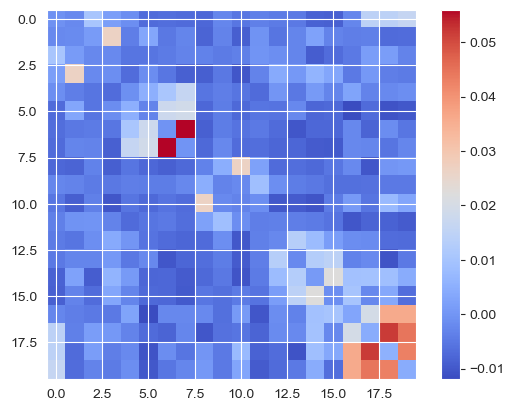

The table for Sobol linkage


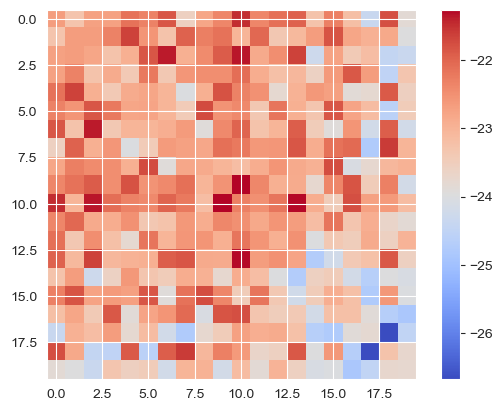

The table for perturbation (ground truth)


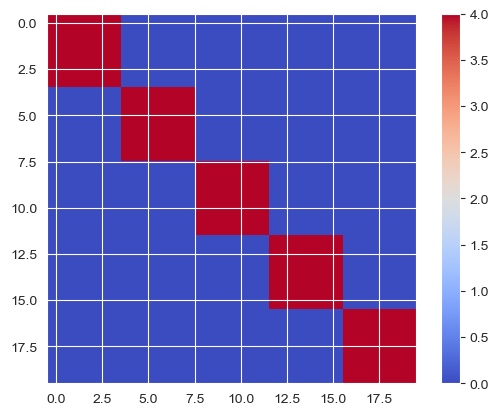

In [1]:
# testing different linkage methods

from Core.PSMetric.Linkage.SobolLinkage import SobolLinkage
from Core.PSMetric.Linkage.TraditionalPerturbationLinkage import TraditionalPerturbationLinkage
from Core.PSMetric.Linkage.ValueSpecificMutualInformation import FasterSolutionSpecificMutualInformation
# testing the linkage methods

from SimplifiedSystem.search_methods import search_local_ps
from utils import announce
from SimplifiedSystem.PSSearchSettings import get_default_search_settings
from Core.FullSolution import FullSolution
from Core.PS import PS, contains, STAR
from BenchmarkProblems.RoyalRoad import RoyalRoad
from Core.get_pRef import get_pRef_from_metaheuristic
import pymoo
import matplotlib.pyplot as plt

def display_table_with_colours(table):
    plt.imshow(table, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.show()

# here we test if we can find pss

# first, we make a benchmark problem
problem = RoyalRoad(5)

# then we make a pRef
pRef = get_pRef_from_metaheuristic(problem=problem,
                                 sample_size=10000,
                                 which_algorithm="GA",
                                   unique=True,
                                 verbose=True)

best_solution = pRef.get_best_solution()
print(f"The best solution is {best_solution}")


atomicity_metric = FasterSolutionSpecificMutualInformation()
atomicity_metric.set_pRef(pRef)
atomicity_metric.set_solution(best_solution)


sobol_metric = SobolLinkage()
sobol_metric.set_pRef(pRef)
sobol_metric.set_solution(best_solution)

perturbation_linkage = TraditionalPerturbationLinkage(problem)
perturbation_linkage.set_solution(best_solution)

print("The table for mutual information")
display_table_with_colours(atomicity_metric.linkage_table)

print("The table for Sobol linkage")
display_table_with_colours(sobol_metric.linkage_table)

print("The table for perturbation (ground truth)")
display_table_with_colours(perturbation_linkage.linkage_table)